# DEEP LEARNING PROJECT 1
---

In [1]:
%load_ext autoreload
%autoreload 2 

import helpers
import config

from models.basic_net import BasicNet
from datasets import PairDataset

import torch.nn as nn
import torch.utils.data as data
import matplotlib.pyplot as plt

from models.ANN import ANNModel
from models.siamese_net import siamese_net
from torchsummary import summary

from models.train_ANN import train_ann
from models.train_ANN import test_ann

from models.train_Siamese import train_siamese
from models.train_Siamese import test_siamese

## Parameters

In [8]:
TRAIN_BATCH_SIZE = 5
CRITERION_DOUBLE = nn.BCELoss()
CRITERION_SINGLE = nn.BCELoss()
EPOCHS = 20
LEARNING_RATE = 0.001

## Load data

In [3]:
pairs = helpers.generate_pair_sets(config.NB_SAMPLES)

train_dataset = PairDataset(pairs[0], pairs[1], pairs[2])
train_dataloader = data.DataLoader(dataset=train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

test_dataset = PairDataset(pairs[3], pairs[4], pairs[5])
test_dataloader = data.DataLoader(dataset=test_dataset, batch_size=config.TEST_BATCH_SIZE, shuffle=True)

## Model 1: Simple model

In [4]:
model1 = ANNModel(input_dim = 2*14*14, hidden_dim = 512, output_dim = 1)

In [18]:
summary(model1, (1 ,2, 14, 14)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         201,216
            Linear-2                  [-1, 512]         262,656
            Linear-3                  [-1, 512]         262,656
            Linear-4                    [-1, 1]             513
Total params: 727,041
Trainable params: 727,041
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.77
Estimated Total Size (MB): 2.79
----------------------------------------------------------------


In [19]:
print("Training with a batch size {0}".format(TRAIN_BATCH_SIZE))

training_losses, training_acc= train_ann(model = model1, dataloader=train_dataloader, learning_rate=LEARNING_RATE, epochs=EPOCHS, criterion=CRITERION_SINGLE)

Training with a batch size 1
Training with 20 epochs, learning rate of 0.001 and BCELoss() as loss function
[Epoch 1, Batch 0/1000]:  [Loss: 0.01]
[Epoch 1, Batch 250/1000]:  [Loss: 27.63]
[Epoch 1, Batch 500/1000]:  [Loss: 27.63]
[Epoch 1, Batch 750/1000]:  [Loss: 27.63]
At epoch 1 the total loss is 15.58391000137478
At epoch 1 the accuracy is 0.436
[Epoch 2, Batch 0/1000]:  [Loss: 0.00]
[Epoch 2, Batch 250/1000]:  [Loss: 27.63]
[Epoch 2, Batch 500/1000]:  [Loss: 0.00]
[Epoch 2, Batch 750/1000]:  [Loss: 27.63]
At epoch 2 the total loss is 15.583896125793457
At epoch 2 the accuracy is 0.436
[Epoch 3, Batch 0/1000]:  [Loss: 27.63]
[Epoch 3, Batch 250/1000]:  [Loss: 0.00]
[Epoch 3, Batch 500/1000]:  [Loss: 0.00]
[Epoch 3, Batch 750/1000]:  [Loss: 27.63]
At epoch 3 the total loss is 15.583896125793457
At epoch 3 the accuracy is 0.436
[Epoch 4, Batch 0/1000]:  [Loss: 27.63]
[Epoch 4, Batch 250/1000]:  [Loss: 27.63]
[Epoch 4, Batch 500/1000]:  [Loss: 27.63]


KeyboardInterrupt: 

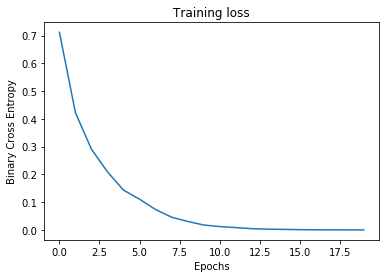

In [16]:
plt.plot(training_losses)
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Training loss')
plt.show()

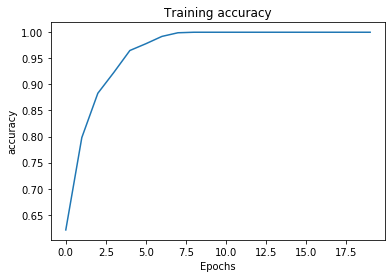

In [17]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

We now need to try the model on the test set.

In [22]:
test_ann(model1,test_dataloader, config.CRITERION_SINGLE)

(0.8191723227500916, 0.807)

## Model 2 : Siamese Net

### Architecture 1

**Options 1** : No weight Sharing, No auxilary function

In [23]:
model2 = siamese_net(weight_sharing = False, architecture = 1)

In [24]:
summary(model2, [(1, 14, 14), (1, 14, 14)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 1, 12, 12]              10
         LeakyReLU-2            [-1, 1, 12, 12]               0
            Conv2d-3            [-1, 1, 10, 10]              10
         LeakyReLU-4            [-1, 1, 10, 10]               0
         MaxPool2d-5              [-1, 1, 5, 5]               0
            Linear-6                  [-1, 512]          13,312
         LeakyReLU-7                  [-1, 512]               0
            Linear-8                   [-1, 10]           5,130
           Softmax-9                   [-1, 10]               0
           Conv2d-10            [-1, 1, 12, 12]              10
        LeakyReLU-11            [-1, 1, 12, 12]               0
           Conv2d-12            [-1, 1, 10, 10]              10
        LeakyReLU-13            [-1, 1, 10, 10]               0
        MaxPool2d-14              [-1, 

C:\Users\Ridha\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [25]:
lr = 0.001
aux_loss = False 
epochs = 30

training_losses, training_acc, test_losses, test_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 30 epochs, a learning rate of 0.001 and BCELoss() as loss function
Without auxilary loss function
Without weight sharing
[Epoch 1, Batch 0/1000]:  [Loss: 0.65]
[Epoch 1, Batch 250/1000]:  [Loss: 0.65]
[Epoch 1, Batch 500/1000]:  [Loss: 0.60]
[Epoch 1, Batch 750/1000]:  [Loss: 0.77]
At epoch 1 the loss is 0.6822404265403748
At epoch 1 the accuracy is 0.6
[Epoch 2, Batch 0/1000]:  [Loss: 0.62]
[Epoch 2, Batch 250/1000]:  [Loss: 0.85]
[Epoch 2, Batch 500/1000]:  [Loss: 0.68]
[Epoch 2, Batch 750/1000]:  [Loss: 0.50]
At epoch 2 the loss is 0.6731359958648682
At epoch 2 the accuracy is 0.612
[Epoch 3, Batch 0/1000]:  [Loss: 0.92]
[Epoch 3, Batch 250/1000]:  [Loss: 0.52]
[Epoch 3, Batch 500/1000]:  [Loss: 0.57]
[Epoch 3, Batch 750/1000]:  [Loss: 0.62]
At epoch 3 the loss is 0.6630438566207886
At epoch 3 the accuracy is 0.632
[Epoch 4, Batch 0/1000]:  [Loss: 0.94]
[Epoch 4, Batch 250/1000]:  [Loss: 0.57]
[Epoch 4, Batch 500/1000]:  [Loss: 0.98]
[Epoch 4, Batch 750/1000]:  [

KeyboardInterrupt: 

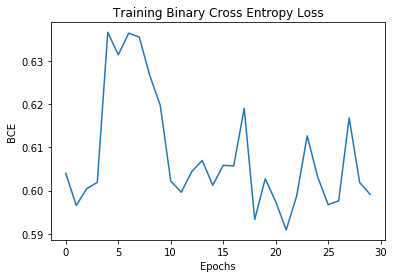

In [34]:
plt.plot(training_losses)
plt.title('Training Binary Cross Entropy Loss')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.show()

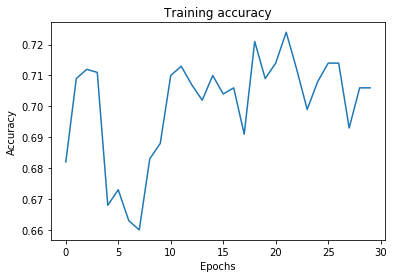

In [35]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [37]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = False)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of 0.63 and an accuracy of 0.68


**Options 2** : Weight Sharing, No auxilary function

In [4]:
model2 = siamese_net(weight_sharing = True , architecture = 1)

In [7]:
lr = 0.001
aux_loss = False 
epochs = 30

training_losses, training_acc, test_losses, test_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 30 epochs, a learning rate of 0.001 and BCELoss() as loss function
Without auxilary loss funciton
With weight sharing
[Epoch 1, Batch 0/1000]:  [Loss: 0.65]
[Epoch 1, Batch 250/1000]:  [Loss: 0.52]
[Epoch 1, Batch 500/1000]:  [Loss: 0.56]
[Epoch 1, Batch 750/1000]:  [Loss: 0.61]
At epoch 1 the loss is 0.6642462611198425
At epoch 1 the accuracy is 0.622
[Epoch 2, Batch 0/1000]:  [Loss: 0.82]
[Epoch 2, Batch 250/1000]:  [Loss: 0.59]
[Epoch 2, Batch 500/1000]:  [Loss: 0.45]
[Epoch 2, Batch 750/1000]:  [Loss: 0.61]
At epoch 2 the loss is 0.6445934772491455
At epoch 2 the accuracy is 0.651
[Epoch 3, Batch 0/1000]:  [Loss: 0.78]
[Epoch 3, Batch 250/1000]:  [Loss: 0.59]
[Epoch 3, Batch 500/1000]:  [Loss: 0.80]
[Epoch 3, Batch 750/1000]:  [Loss: 0.62]
At epoch 3 the loss is 0.6729118227958679
At epoch 3 the accuracy is 0.573
[Epoch 4, Batch 0/1000]:  [Loss: 0.62]
[Epoch 4, Batch 250/1000]:  [Loss: 0.60]
[Epoch 4, Batch 500/1000]:  [Loss: 0.97]
[Epoch 4, Batch 750/1000]:  [L

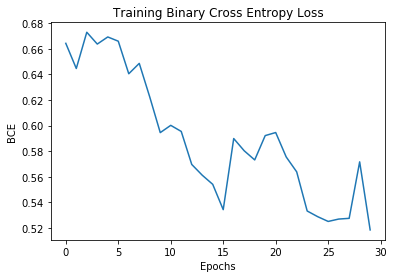

In [8]:
plt.plot(training_losses)
plt.title('Training Binary Cross Entropy Loss')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.show()

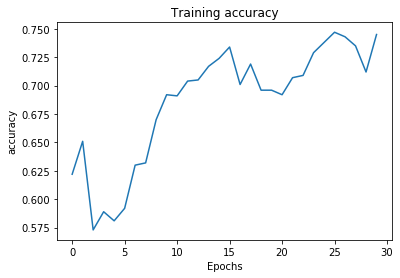

In [9]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

In [11]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = False)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of 0.52 and an accuracy of 0.74


**Option 3:**  No weight Sharing, auxilary function

In [12]:
model2 = siamese_net(weight_sharing = False , architecture = 1)

In [14]:
lr = 0.001
aux_loss = True 
epochs = 30

training_losses, training_acc, test_losses, test_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 30 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss funciton
Without weight sharing
[Epoch 1, Batch 0/1000]:  [Loss: 1.13]
[Epoch 1, Batch 250/1000]:  [Loss: 0.84]
[Epoch 1, Batch 500/1000]:  [Loss: 0.79]
[Epoch 1, Batch 750/1000]:  [Loss: 0.74]
At epoch 1 the loss is 0.7762801647186279
At epoch 1 the accuracy is 0.642
[Epoch 2, Batch 0/1000]:  [Loss: 1.02]
[Epoch 2, Batch 250/1000]:  [Loss: 0.73]
[Epoch 2, Batch 500/1000]:  [Loss: 0.85]
[Epoch 2, Batch 750/1000]:  [Loss: 0.46]
At epoch 2 the loss is 0.6750748753547668
At epoch 2 the accuracy is 0.733
[Epoch 3, Batch 0/1000]:  [Loss: 0.50]
[Epoch 3, Batch 250/1000]:  [Loss: 0.70]
[Epoch 3, Batch 500/1000]:  [Loss: 0.84]
[Epoch 3, Batch 750/1000]:  [Loss: 0.53]
At epoch 3 the loss is 0.6098330616950989
At epoch 3 the accuracy is 0.8
[Epoch 4, Batch 0/1000]:  [Loss: 0.43]
[Epoch 4, Batch 250/1000]:  [Loss: 1.10]
[Epoch 4, Batch 500/1000]:  [Loss: 0.67]
[Epoch 4, Batch 750/1000]:  [Los

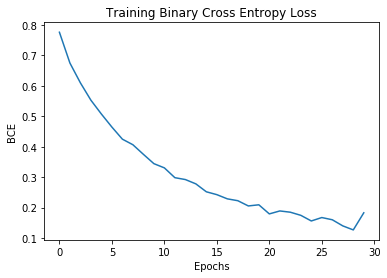

In [15]:
plt.plot(training_losses)
plt.title('Training Binary Cross Entropy Loss')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.show()

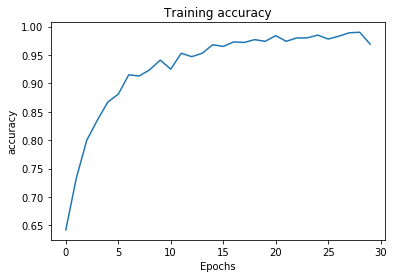

In [16]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

In [19]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = True)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of 0.56 and an accuracy of 0.83


**Option 4:**  Weight Sharing, auxilary function

In [5]:
def compute_results(weight_sharing = True, aux_loss = True , architecture = 1):
    
    channels = [24, 48, 64]
    hidden_layer = [100, 300]
    
    lr = 0.001
    epochs = 20
    
    results = [] #training_losses, training_acc, test_losses, test_acc
    
    for c in channels:
        for n in hidden_layer:
            model = siamese_net(weight_sharing , architecture, nb_channels = c, nb_hidden = n)

            training_losses, training_acc, test_losses, test_acc = train_siamese(model, train_dataloader, test_dataloader, epochs, lr, aux_loss)

            results.append([training_losses, training_acc, test_losses, test_acc])
            
            print("For the parammeters {0} channels and {1} layers we get :".format(c,n))
            final_test_loss, final_test_loss_acc = test_siamese(model, test_dataloader, aux_loss = True)
            print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(final_test_loss,final_test_loss_acc))

    return results

In [6]:
def plots_results(results, architecture = 1):
    
    channels = [24, 48, 64]
    hidden_layer = [100, 300]
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y' , 'k']
        
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize= (14,8))

    for i, r in enumerate(results) :
        
        channel = channels[i % 3]
        fc_layer = hidden_layer[i % 2]
        
        ax1.plot(r[0], label = 'training loss-{0} channels-{1} fc '.format(channel, fc_layer))
        ax1.plot(r[2], color = colors[i],  linestyle='dashed', label = 'test loss-{0} channels-{1} fc '.format(channel, fc_layer))

        ax2.plot(r[1], label = 'training accuracy-{0} channels-{1} fc '.format(channel, fc_layer))
        ax2.plot(r[3], color = colors[i],  linestyle='dashed', label = 'test accuracy-{0} channels-{1} fc '.format(channel, fc_layer))
    
    ax1.set_title('Training Binary Cross Entropy Loss for architecture {0}'.format(architecture))
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("BCE")

    ax2.set_title('Training accuracy for architecture {0}'.format(architecture))
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")

    fig.legend(bbox_to_anchor=(1.15, 0.1),loc = 'lower right')
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
    plt.show()

In [103]:
results1 = compute_results(weight_sharing = True, aux_loss = True , architecture = 1)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 12.61]
At epoch 1 the loss is 2.0124266147613525
At epoch 1 the accuracy is 0.662
[Epoch 2, Batch 0/200]:  [Loss: 1.05]
At epoch 2 the loss is 0.5377933979034424
At epoch 2 the accuracy is 0.854
[Epoch 3, Batch 0/200]:  [Loss: 0.13]
At epoch 3 the loss is 0.3022773265838623
At epoch 3 the accuracy is 0.931
[Epoch 4, Batch 0/200]:  [Loss: 0.02]
At epoch 4 the loss is 0.16422304511070251
At epoch 4 the accuracy is 0.965
[Epoch 5, Batch 0/200]:  [Loss: 0.51]
At epoch 5 the loss is 0.08241870999336243
At epoch 5 the accuracy is 0.977
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.062038179486989975
At epoch 6 the accuracy is 0.987
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.016887003555893898
At epoch 7 the accuracy is 0.997
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.0033

[Epoch 4, Batch 0/200]:  [Loss: 0.32]
At epoch 4 the loss is 0.128689244389534
At epoch 4 the accuracy is 0.972
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.10790641605854034
At epoch 5 the accuracy is 0.975
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.029724622145295143
At epoch 6 the accuracy is 0.995
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.007168505806475878
At epoch 7 the accuracy is 1.0
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.002076485427096486
At epoch 8 the accuracy is 1.0
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.000340423546731472
At epoch 9 the accuracy is 1.0
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.00022598203213419765
At epoch 10 the accuracy is 1.0
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.00018000580894295126
At epoch 11 the accuracy is 1.0
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0001502555969636887

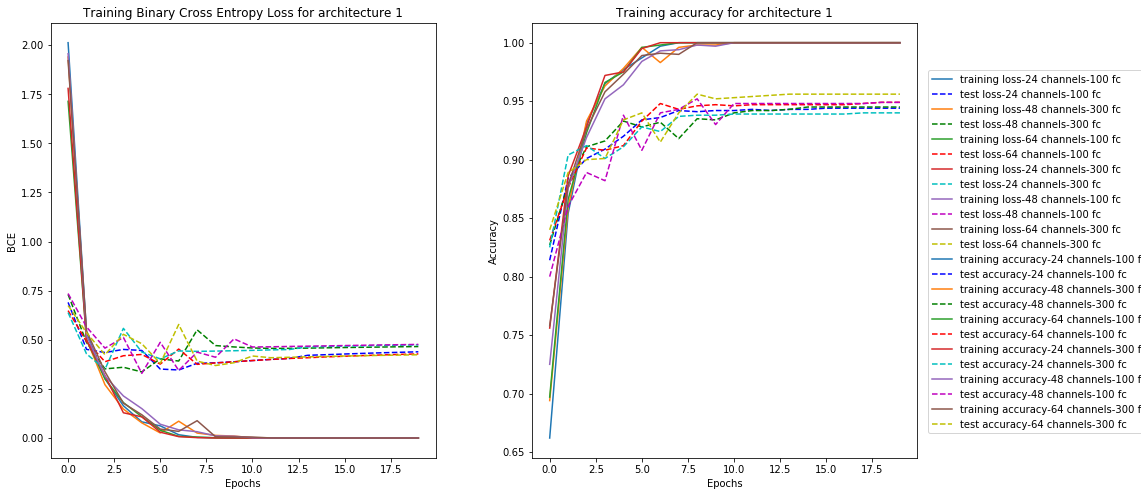

In [104]:
plots_results(results1, architecture = 1)

### Architecture 2

In [7]:
results2 = compute_results(weight_sharing = True, aux_loss = True , architecture = 2)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 10.92]
At epoch 1 the loss is 2.1119494438171387
At epoch 1 the accuracy is 0.621
[Epoch 2, Batch 0/200]:  [Loss: 1.07]
At epoch 2 the loss is 0.6073348522186279
At epoch 2 the accuracy is 0.85
[Epoch 3, Batch 0/200]:  [Loss: 0.09]
At epoch 3 the loss is 0.36715346574783325
At epoch 3 the accuracy is 0.911
[Epoch 4, Batch 0/200]:  [Loss: 0.40]
At epoch 4 the loss is 0.23394721746444702
At epoch 4 the accuracy is 0.938
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.1459774225950241
At epoch 5 the accuracy is 0.97
[Epoch 6, Batch 0/200]:  [Loss: 0.36]
At epoch 6 the loss is 0.10939779132604599
At epoch 6 the accuracy is 0.983
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.06715943664312363
At epoch 7 the accuracy is 0.99
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.026621960

At epoch 4 the loss is 0.23263780772686005
At epoch 4 the accuracy is 0.947
[Epoch 5, Batch 0/200]:  [Loss: 0.12]
At epoch 5 the loss is 0.15274322032928467
At epoch 5 the accuracy is 0.971
[Epoch 6, Batch 0/200]:  [Loss: 0.71]
At epoch 6 the loss is 0.09176728874444962
At epoch 6 the accuracy is 0.977
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.038871005177497864
At epoch 7 the accuracy is 0.991
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.049169767647981644
At epoch 8 the accuracy is 0.98
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.03470255434513092
At epoch 9 the accuracy is 0.994
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.01752653531730175
At epoch 10 the accuracy is 0.997
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.006037641316652298
At epoch 11 the accuracy is 1.0
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0028771553188562393
At epoch 12 the accuracy is 1.0
[Ep

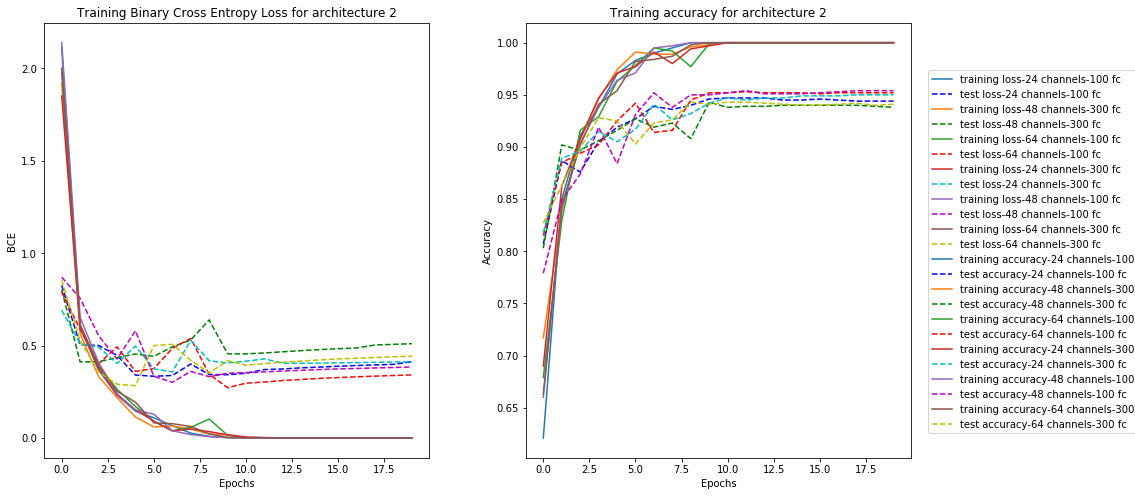

In [8]:
plots_results(results2, architecture = 2)

### Architecture 3

In [6]:
results3 = compute_results(weight_sharing = True, aux_loss = True , architecture = 3)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 12.81]
At epoch 1 the loss is 2.1311850547790527
At epoch 1 the accuracy is 0.618
[Epoch 2, Batch 0/200]:  [Loss: 0.87]
At epoch 2 the loss is 0.6640914678573608
At epoch 2 the accuracy is 0.818
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.43114638328552246
At epoch 3 the accuracy is 0.884
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.25393638014793396
At epoch 4 the accuracy is 0.945
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.18686629831790924
At epoch 5 the accuracy is 0.958
[Epoch 6, Batch 0/200]:  [Loss: 0.20]
At epoch 6 the loss is 0.08921642601490021
At epoch 6 the accuracy is 0.982
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.07550322264432907
At epoch 7 the accuracy is 0.988
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.05473

At epoch 4 the loss is 0.2682771682739258
At epoch 4 the accuracy is 0.93
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.20764222741127014
At epoch 5 the accuracy is 0.946
[Epoch 6, Batch 0/200]:  [Loss: 0.12]
At epoch 6 the loss is 0.13513779640197754
At epoch 6 the accuracy is 0.975
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.10204386711120605
At epoch 7 the accuracy is 0.978
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.03503426909446716
At epoch 8 the accuracy is 0.996
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.06679659336805344
At epoch 9 the accuracy is 0.989
[Epoch 10, Batch 0/200]:  [Loss: 0.30]
At epoch 10 the loss is 0.018203189596533775
At epoch 10 the accuracy is 0.997
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.0021451315842568874
At epoch 11 the accuracy is 1.0
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0008152962545864284
At epoch 12 the accuracy is 1.0
[Epo

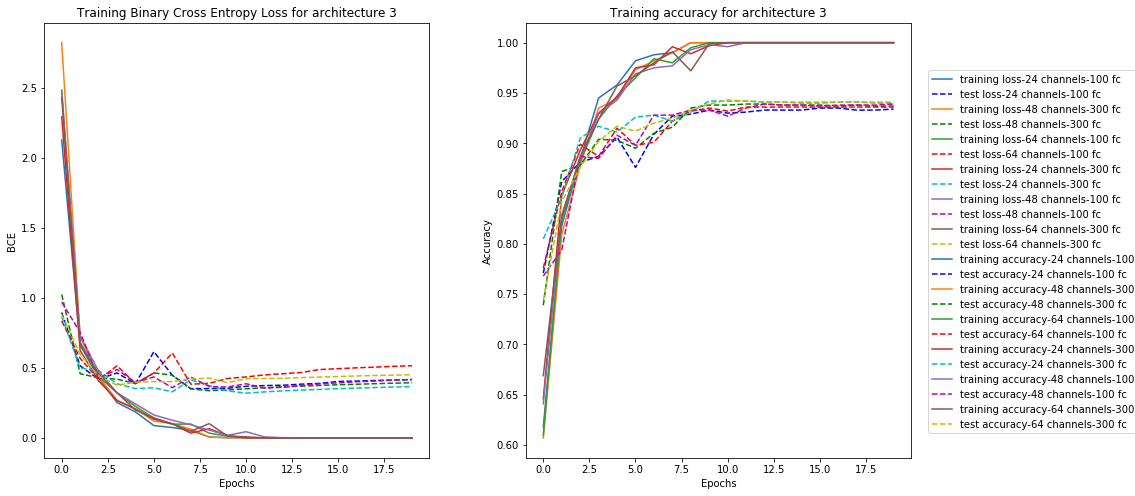

In [7]:
plots_results(results3, architecture = 3)

### Architecture 4

In [7]:
results4 = compute_results(weight_sharing = True, aux_loss = True , architecture = 4)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 15.93]
At epoch 1 the loss is 2.210127353668213
At epoch 1 the accuracy is 0.639
[Epoch 2, Batch 0/200]:  [Loss: 0.71]
At epoch 2 the loss is 0.880337119102478
At epoch 2 the accuracy is 0.793
[Epoch 3, Batch 0/200]:  [Loss: 0.67]
At epoch 3 the loss is 0.5809041261672974
At epoch 3 the accuracy is 0.864
[Epoch 4, Batch 0/200]:  [Loss: 1.24]
At epoch 4 the loss is 0.4248925447463989
At epoch 4 the accuracy is 0.904
[Epoch 5, Batch 0/200]:  [Loss: 0.29]
At epoch 5 the loss is 0.30428802967071533
At epoch 5 the accuracy is 0.931
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.21482570469379425
At epoch 6 the accuracy is 0.96
[Epoch 7, Batch 0/200]:  [Loss: 0.21]
At epoch 7 the loss is 0.1298702210187912
At epoch 7 the accuracy is 0.978
[Epoch 8, Batch 0/200]:  [Loss: 0.22]
At epoch 8 the loss is 0.07609630376

[Epoch 5, Batch 0/200]:  [Loss: 0.18]
At epoch 5 the loss is 0.29070916771888733
At epoch 5 the accuracy is 0.927
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.20995548367500305
At epoch 6 the accuracy is 0.963
[Epoch 7, Batch 0/200]:  [Loss: 0.30]
At epoch 7 the loss is 0.14646831154823303
At epoch 7 the accuracy is 0.972
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.12284315377473831
At epoch 8 the accuracy is 0.973
[Epoch 9, Batch 0/200]:  [Loss: 0.14]
At epoch 9 the loss is 0.061403583735227585
At epoch 9 the accuracy is 0.99
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.03002791479229927
At epoch 10 the accuracy is 0.998
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.007918584160506725
At epoch 11 the accuracy is 1.0
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0027340587694197893
At epoch 12 the accuracy is 1.0
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.001826301217079

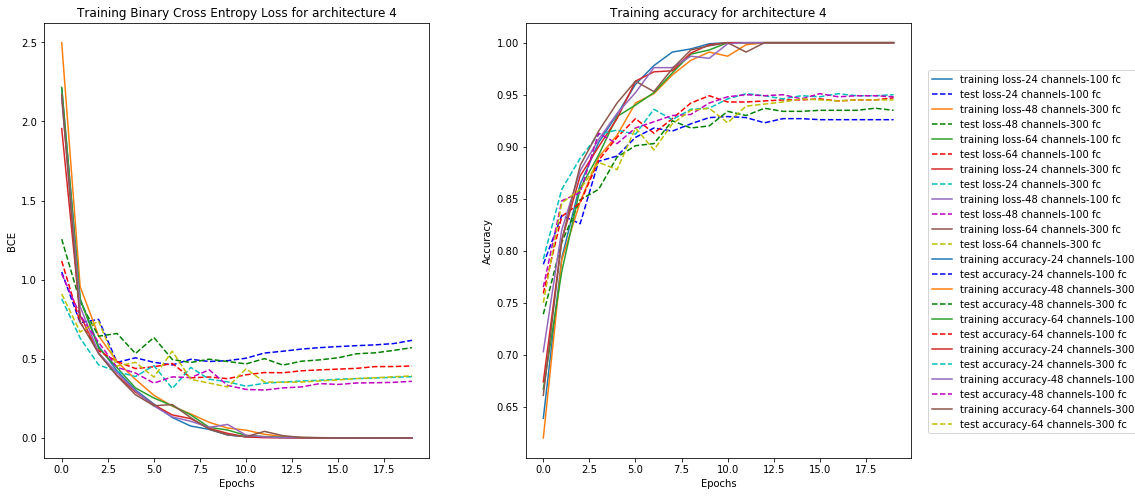

In [8]:
plots_results(results4, architecture = 4)

### Brouillon

To keep in mind after a conv layer we get : (W - F + 2P)/S + 1

In [ ]:
elem = next(iter(train_dataloader))['digit_labels']

In [ ]:
elem

In [ ]:
next(iter(train_dataloader))['images'].shape

In [ ]:
plt.imshow(elem[0,0,:,:], cmap='gray')

In [ ]:
plt.imshow(elem[0,1,:,:], cmap='gray')

In [ ]:
model = BasicNet()

train(model=model, dataloader=train_dataloader, epochs=config.EPOCHS, criterion=config.CRITERION)

In [ ]:
predicted, accuracy = predict(model=model, dataloader=test_dataloader)

In [ ]:
print(accuracy)